In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

In [10]:
# 실습01번
titanic_train = pd.read_csv('titanic_train.csv',header=0)
titanic_train['Age'].fillna(titanic_train['Age'].mean(),inplace=True)

def check(a):
    if a<10:
        return '유아'
    elif a<20:
        return '10대'
    elif a<30:
        return '20대'
    elif a<40:
        return '30대'
    elif a<50:
        return '40대'
    elif a<60:
        return '50대'
    elif a<70:
        return '60대'
    else:
        return '노인'

titanic_train['Age_Range'] = titanic_train['Age'].apply(check)
titanic_result1 = titanic_train.groupby('Age_Range')['Survived'].sum()
titanic_result2 = titanic_train.groupby('Sex')['Survived'].sum()
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,20대
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,10대
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,20대
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,20대


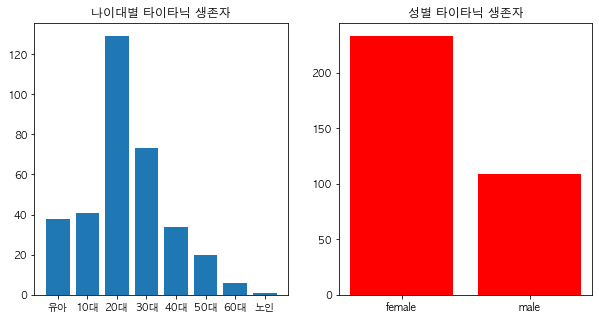

In [11]:
plt.figure(figsize=(10,5))

# 나이대별 타이타닉 생존자
# reindex 가능
plt.subplot(121)
x01 = ['유아','10대','20대','30대','40대','50대','60대','노인']
y01 = [titanic_result1[x01[i]] for i in range(len(x01))]
plt.bar(x01,y01)
plt.title('나이대별 타이타닉 생존자')

# 성별 타이타닉 생존자
plt.subplot(122)
x02 = ['female','male']
y02 = [titanic_result2[x02[i]] for i in range(len(x02))]
plt.bar(x02,y02,color='r')
plt.title('성별 타이타닉 생존자')


plt.show()

In [3]:
#실습02

kr_daily = pd.read_csv('kr_daily.csv',header=0)
kr_daily

,date,confirmed,death,released,candidate,negative
0,20200121,1,0,0,0,0
1,20200122,1,0,0,0,0
2,20200123,1,0,0,0,0
3,20200124,2,0,0,0,0
4,20200125,2,0,0,0,0
...,...,...,...,...,...,...
128,20200528,11344,269,10340,857322,834952
129,20200529,11402,269,10363,873718,849161
130,20200530,11441,269,10398,891460,865162
131,20200531,11468,270,10405,899354,876060


In [8]:
kr_daily['new_date'] = pd.to_datetime(kr_daily['date'],format='%Y%m%d')
kr_daily['new_date']
kr_daily.index = kr_daily['new_date']  #인덱스 처리

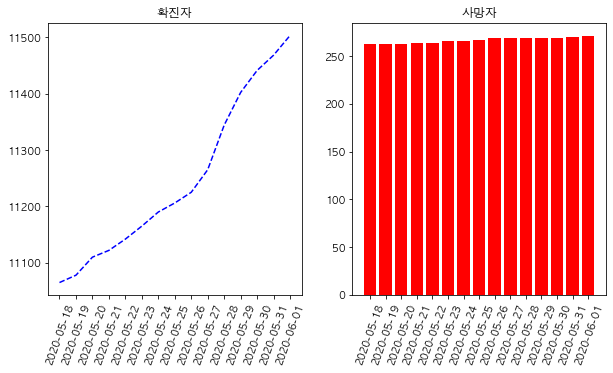

In [9]:
plt.figure(figsize=(10,5))
#grid = plt.GridSpec(1,2)

plt.subplot(121)
x1 = kr_daily['new_date']
y1 = kr_daily['confirmed']
plt.plot(x1['2020-05-18':],y1[118:],'--b')
#plt.axis(['2020-05-18','2020-06-01',11050,11550])
plt.title('확진자')
plt.xticks(x1[118:], rotation=70)

plt.subplot(122)
x2 = kr_daily['new_date']
y2 = kr_daily['death']
plt.bar(x2[118:],y2[118:],color='r')
#plt.axis(['2020-05-18','2020-06-01',0,290])
plt.title('사망자')
plt.xticks(x2[118:], rotation=70)

plt.show()